In [1]:
from datetime import datetime 
import pandas as pd
from utils import simulator_period,save_sim_resuls
from subjects.corr_coef import CorrCoeff,TrendFunc
import numpy as np
import matplotlib.pyplot as plt


### Arima troubleshooting

```
! pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')


```

```
!conda install -c conda-forge pmdarima -y
```


In [2]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

In [3]:
casino_fig=pd.read_csv('casino_fig.csv', parse_dates = ['Date'])


In [4]:
casino_fig.head()

,Date,Heads,Day_Result,Total_Bets,Total_Hands
0,2022-01-01,25,187.148310,79439.490943,3972
1,2022-01-02,21,651.090018,46402.445157,2581
2,2022-01-03,10,2469.903372,33963.973956,2096
3,2022-01-04,10,-146.716214,13660.124678,1361
4,2022-01-05,14,-822.788468,59365.320499,2295


In [5]:
head_serias = casino_fig[['Date','Heads']]
head_serias

,Date,Heads
0,2022-01-01,25
1,2022-01-02,21
2,2022-01-03,10
3,2022-01-04,10
4,2022-01-05,14
...,...,...
1092,2024-12-28,43
1093,2024-12-29,41
1094,2024-12-30,23
1095,2024-12-31,31


In [6]:
head_serias = head_serias.set_index('Date')


In [7]:
head_serias

,Heads
Date,
2022-01-01,25
2022-01-02,21
2022-01-03,10
2022-01-04,10
2022-01-05,14
...,...
2024-12-28,43
2024-12-29,41
2024-12-30,23


### Разделяем выборку на тест и тренинг

In [8]:
test_size = 28

In [9]:
from sktime.forecasting.model_selection import temporal_train_test_split

head_train, head_test = temporal_train_test_split(head_serias, test_size=test_size)

### Горизонт прогнозирования

In [10]:
fh = np.arange(1, test_size+1)
fh.size


28

### Обучаем Ариму

In [11]:
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=7,suppress_warnings=True)
forecaster.fit(head_train);



#### Предсказываем

In [12]:
head_pred = forecaster.predict(fh);

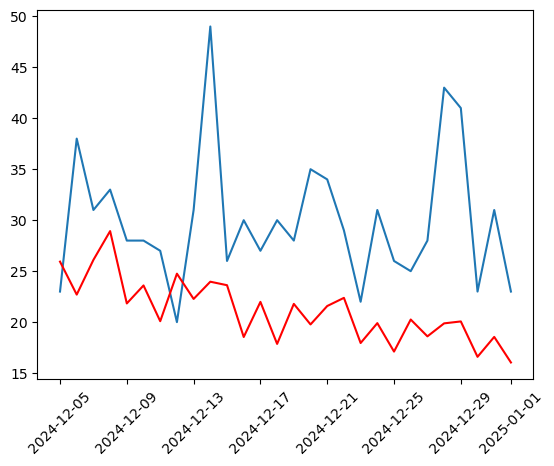

In [13]:
plt.plot(head_test)
plt.plot(head_pred,color = 'red')
plt.tick_params(axis='x', labelrotation=45)

### ETS

In [15]:
from sktime.forecasting.ets import AutoETS

In [16]:
forecaster_ets = AutoETS(auto=True,  n_jobs=-1, sp=7) 
forecaster_ets.fit(head_train) 

/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/home/an/.config/jupyterlab-desktop/envs/env_1/l

AutoETS(auto=True, n_jobs=-1, sp=7)

In [17]:
head_pred_ets = forecaster_ets.predict(fh)

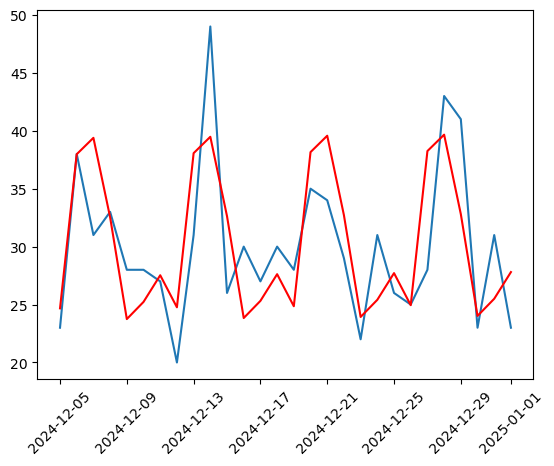

In [18]:
plt.plot(head_test)
plt.plot(head_pred_ets,color = 'red')
plt.tick_params(axis='x', labelrotation=45)